## Import Requiered llibraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load Crod Production Data

In [2]:
# load Data and get the Information
df=pd.read_csv(rf"C:\Users\Goutam\OneDrive\Desktop\Unified Mentor\Crop Data\Crop Production data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


### Some Important Analysis of Crop production Data

In [3]:
# (1). Identify the most commonly grown crops

common_crops = df.groupby('Crop')['Area'].sum().sort_values(ascending=False)
print(":*:Most commonly grown crops:")
print(common_crops.head(10))

# (2). Determine the areas with the highest production for specific crops

highest_production = df.groupby('Crop')['Production'].max().reset_index()
print("\n:*:Areas with the highest production for specific crops:")
highest_production.head(10)


:*:Most commonly grown crops:
Crop
Rice                 7.471253e+08
Wheat                4.707136e+08
Cotton(lint)         1.565681e+08
Bajra                1.411408e+08
Jowar                1.377159e+08
Soyabean             1.354508e+08
Maize                1.217467e+08
Gram                 1.182080e+08
Groundnut            1.027354e+08
Rapeseed &Mustard    8.658064e+07
Name: Area, dtype: float64

:*:Areas with the highest production for specific crops:


,Crop,Production
0,Apple,0.0
1,Arcanut (Processed),48292.0
2,Arecanut,538587.0
3,Arhar/Tur,394592.0
4,Ash Gourd,0.0
5,Atcanut (Raw),226588.0
6,Bajra,826816.0
7,Banana,2390840.0
8,Barley,241202.0
9,Bean,470.0


In [4]:
# Aggregate the data by season to compare crop production

seasonal_production = df.groupby('Season')['Production'].sum().reset_index()
print("Crop production between different seasons:")
seasonal_production

Crop production between different seasons:


,Season,Production
0,Autumn,6.441377e+07
1,Kharif,4.029970e+09
2,Rabi,2.051688e+09
3,Summer,1.706579e+08
4,Whole Year,1.344248e+11
5,Winter,4.345498e+08


In [5]:
# Identify which crops are typically grown during each season

crops_by_season = df.groupby(['Season', 'Crop']).size().unstack(fill_value=0)
print("\nCrops typically grown during each season:")
crops_by_season


Crops typically grown during each season:


Crop,Apple,Arcanut (Processed),Arecanut,Arhar/Tur,Ash Gourd,Atcanut (Raw),Bajra,Banana,Barley,Bean,...,Turmeric,Turnip,Urad,Varagu,Water Melon,Wheat,Yam,other fibres,other misc. pulses,other oilseeds
Season,,,,,,,,,,,,,,,,,,,,,
Autumn,0,0,0,18,0,0,0,6,0,0,...,6,0,291,0,0,0,0,0,0,0
Kharif,0,0,16,6798,0,0,4672,131,134,20,...,135,0,5947,45,0,7,0,0,29,248
Rabi,0,0,118,447,0,0,264,60,4017,0,...,382,0,1872,13,0,7520,0,0,41,303
Summer,0,0,0,28,0,0,331,190,0,0,...,1,0,1158,0,0,300,0,0,0,0
Whole Year,4,20,1443,256,44,20,160,2815,48,0,...,3676,8,173,0,85,55,36,10,0,82
Winter,0,0,0,31,0,0,0,7,0,0,...,2,0,409,0,0,17,0,0,0,0


Overall agricultural production trends over the years:
Crop_Year
1997     851232906.00
1998    5825320640.40
1999    6434665985.10
2000    7449709127.10
2001    7465540840.27
2002    7696955162.64
2003    7917973504.73
2004    8189461694.86
2005    8043757329.74
2006    8681913123.78
2007    6879442338.58
2008    7717018402.16
2009    7660494024.81
2010    6307608525.37
2011   14308904087.13
2012    8171054746.03
2013   12903588632.88
2014    8664540631.11
2015       6935064.70
Name: Production, dtype: float64


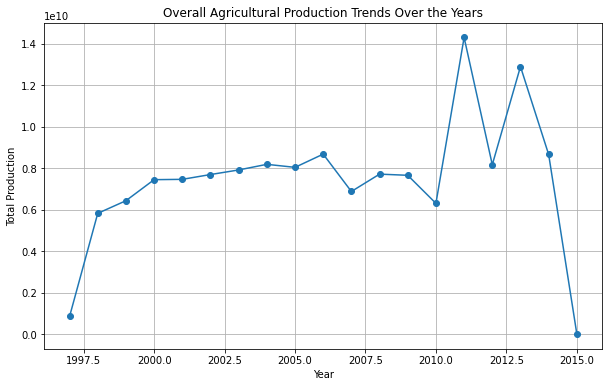

In [6]:
# (1). Aggregate the data by crop year to analyze overall agricultural production trends

yearly_production = df.groupby('Crop_Year')['Production'].sum()
pd.options.display.float_format = '{:.2f}'.format #  This command is convert this num(8.512329e+08) into full num(851232906.00)
print("Overall agricultural production trends over the years:")
print(yearly_production)

# (2). Visualize the trends in overall agricultural production over the years

plt.figure(figsize=(10, 6))
plt.plot(yearly_production.index, yearly_production.values, marker='o')
plt.title('Overall Agricultural Production Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Production')
plt.grid(True)
plt.show()


In [7]:
# (3). Identify significant changes or patterns in crop production from year to year

yearly_production_change = yearly_production.pct_change().reset_index()
print("\nYear-on-year changes in agricultural production:")
yearly_production_change


Year-on-year changes in agricultural production:


,Crop_Year,Production
0,1997,NaN
1,1998,5.84
2,1999,0.10
3,2000,0.16
4,2001,0.00
5,2002,0.03
6,2003,0.03
7,2004,0.03
8,2005,-0.02
9,2006,0.08


In [8]:
# (1). Aggregate the data by district or state to analyze crop production variations
regional_production = df.groupby('District_Name')['Production'].sum()

## Alternatively, if you want to aggregate by state:
## regional_production = df.groupby('State_Name')['Production'].sum()

# (2). Determine regions with the highest and lowest agricultural productivity
highest_productivity_region = regional_production.idxmax() #idxmax() returns the index (location) of the maximum value 
highest_productivity_value = regional_production.max() #max returns max values

lowest_productivity_region = regional_production.idxmin()
lowest_productivity_value = regional_production.min()

# Print the results
print("Regions with the highest and lowest agricultural productivity:")
print("1. Highest Productivity Region:-", highest_productivity_region, "with a total production of :-", highest_productivity_value)
print("2. Lowest Productivity Region:-", lowest_productivity_region, "with a total production of:-", lowest_productivity_value)


Regions with the highest and lowest agricultural productivity:
1. Highest Productivity Region:- KOZHIKODE with a total production of :- 15280739862.95
2. Lowest Productivity Region:- MUMBAI with a total production of:- 2.0


Crop
Coconut        129981629216.29
Sugarcane        5535681525.92
Rice             1605470383.37
Wheat            1332825656.80
Potato            424826343.86
Cotton(lint)      297000015.70
Maize             273341803.57
Jute              181558177.90
Banana            146132679.64
Soyabean          141837219.40
Name: Production, dtype: float64
High-value crops based on production:


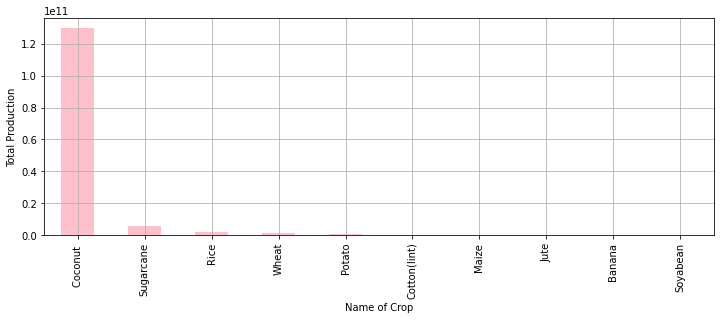

In [9]:
# Calculate the total production for each crop

crop_production = df.groupby('Crop')['Production'].sum().sort_values(ascending=False)
# Print high-value crops (top 10)
print(crop_production.head(10))
print("High-value crops based on production:")
crop_production_10=crop_production.head(10)
crop_production_10.plot(kind='bar',figsize=(12,4),color="pink")
plt.xlabel('Name of Crop')
plt.ylabel("Total Production")
plt.grid(True)


In [10]:
# Calculate average yield for each crop
df['Average_Yield'] = round(df['Production'] / df['Area'],2)

# Analyze factors affecting production for specific crops 
crop_factors_analysis = df.groupby('Crop')[['Area', 'Average_Yield', 'Production']].mean()

# Print factors affecting production for specific crops
print("\nFactors affecting production for specific crops:")
crop_factors_analysis



Factors affecting production for specific crops:


,Area,Average_Yield,Production
Crop,,,
Apple,2.25,0.00,0.00
Arcanut (Processed),7205.80,1.28,9641.55
Arecanut,3812.31,2.16,13229.25
Arhar/Tur,7626.23,0.80,5261.02
Ash Gourd,37.36,0.00,0.00
...,...,...,...
Wheat,59591.54,2.09,169183.25
Yam,49.31,0.00,0.00
other fibres,1263.80,0.00,0.00


Correlation matrix: 
               Crop_Year  Area  Production  Average_Yield
Crop_Year           1.00 -0.03        0.01           0.01
Area               -0.03  1.00        0.04           0.00
Production          0.01  0.04        1.00           0.33
Average_Yield       0.01  0.00        0.33           1.00


<AxesSubplot:>

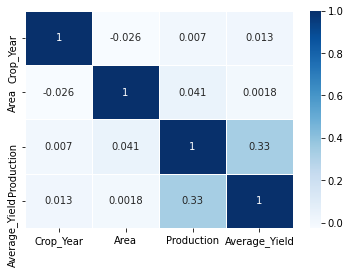

In [11]:
# Compute the correlation matrix for relevant variables
correlation_matrix = df.corr()

# Print the correlation matrix
print("Correlation matrix:",f"\n{correlation_matrix}")
sns.heatmap(correlation_matrix,cmap='Blues',annot=True,linewidths=.5)

In [12]:
# Extract correlation coefficients for production with other variables

production_correlations = correlation_matrix['Production']

# Print correlation coefficients
print("\nCorrelation coefficients with production:")
production_correlations


Correlation coefficients with production:


Crop_Year       0.01
Area            0.04
Production      1.00
Average_Yield   0.33
Name: Production, dtype: float64

In [13]:
# Analyze area utilization for each crop
crop_area= df.groupby('Crop')['Area'].sum().reset_index()

total_area=df["Area"].sum() # Total area of Crops
def v(x):
    a=round((x/total_area)*100,2)
    return a
crop_area['Area%']=crop_area["Area"].apply(v)
crop_area_s=crop_area.sort_values("Area%",ascending=0)
crop_area_s[crop_area_s['Area%']>=1]

,Crop,Area,Area%
95,Rice,747125281.30,25.29
119,Wheat,470713551.96,15.94
33,Cotton(lint),156568075.00,5.30
6,Bajra,141140804.00,4.78
48,Jowar,137715913.00,4.66
105,Soyabean,135450782.00,4.59
59,Maize,121746673.38,4.12
41,Gram,118207960.95,4.00
43,Groundnut,102735379.25,3.48
92,Rapeseed &Mustard,86580638.03,2.93


In [14]:
# Analyze area utilization for each crop
crop_area1 = df.groupby('Crop')['Area'].sum()
total_area=df["Area"].sum() # Total area of Crops

# Calculate the percentage of total area utilized by each crop
crop_area1_percentage = round((crop_area1 / total_area) * 100,2)

crop_area1['Area%']=crop_area1

# Sort crops by the percentage of total area utilized
crop_area1_sorted = crop_area1_percentage.sort_values(ascending=False).reset_index()

# Print the sorted list of crops by area utilization
print("\nCrops sorted by percentage of total area utilized:")
crop_area1_sorted[crop_area1_sorted['Area']>=1]



Crops sorted by percentage of total area utilized:


,Crop,Area
0,Rice,25.29
1,Wheat,15.94
2,Cotton(lint),5.30
3,Bajra,4.78
4,Jowar,4.66
5,Soyabean,4.59
6,Maize,4.12
7,Gram,4.00
8,Groundnut,3.48
9,Rapeseed &Mustard,2.93


### here we have done the analysis of Crop production data.